In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

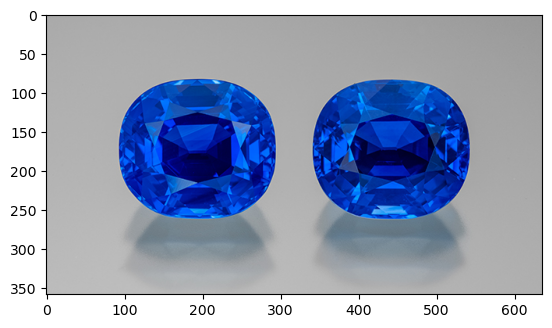

In [3]:
img = cv2.imread('a1images/sapphire.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [35]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 80])
upper_blue = np.array([120, 255, 255])

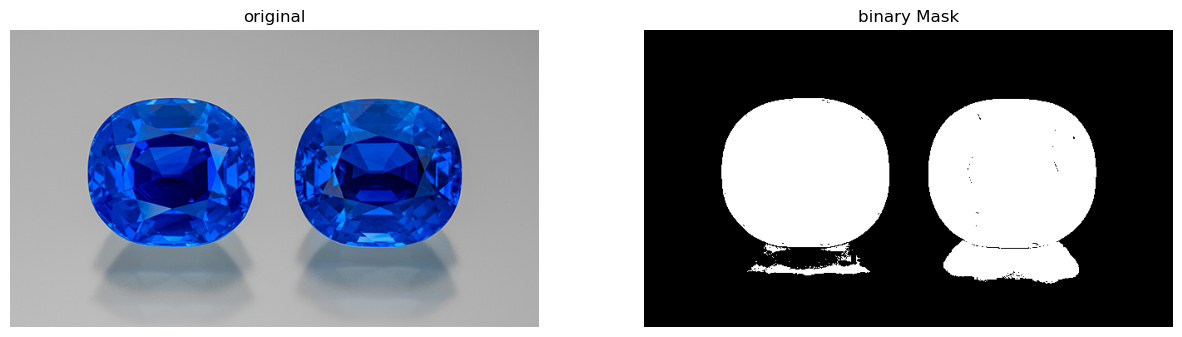

In [48]:
lower_blue = np.array([100, 50, 18])
upper_blue = np.array([130, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("binary Mask")
plt.axis('off')
plt.show()

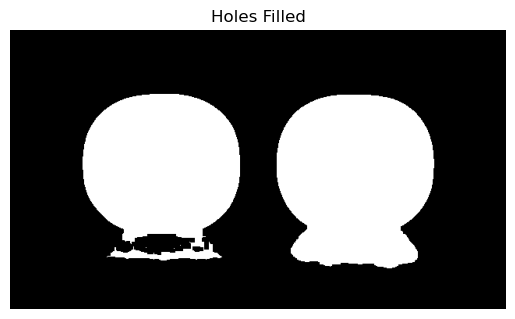

In [56]:
morph_kernel = np.ones((5, 5), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, morph_kernel)
mask_filled = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(mask_filled, cmap='gray')
plt.title("Holes Filled")
plt.axis('off')
plt.show()

In [60]:
components, labels, stats, cent = cv2.connectedComponentsWithStats(mask_filled, connectivity=8)

areas = stats[:, cv2.CC_STAT_AREA]
sapphire_areas = areas[1:]
print(f"Areas of sapphires: {sapphire_areas}")

Areas of sapphires: [32269 36476     1     1     1]


In [62]:
pixel_size = 0.005 
f = 8 
D = 480   # distance in mm

real_areas = sapphire_areas * ((D * pixel_size / f) ** 2)

print("Real-world areas in mm^2:", real_areas)

Real-world areas in mm^2: [2.90421e+03 3.28284e+03 9.00000e-02 9.00000e-02 9.00000e-02]


In [76]:
threshold = 1
real_sapphire_areas = [a for a in real_areas if a > threshold]
for area in real_sapphire_areas:
    print(f"Sapphire area: {area:.2f} mm²")

Sapphire area: 2904.21 mm²
Sapphire area: 3282.84 mm²
